Dataset loaded. Total samples: 19818
Trained full model and vectorizer loaded.

Accuracy: 0.9273461150353178

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.48      0.61       474
    positive       0.93      0.99      0.96      3490

    accuracy                           0.93      3964
   macro avg       0.89      0.73      0.79      3964
weighted avg       0.92      0.93      0.92      3964



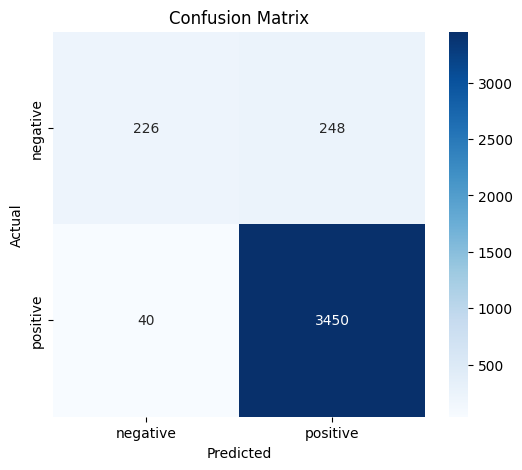


Evaluation results saved to ../data/processed/evaluation_results_full.csv


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
df = pd.read_csv("../data/processed/preprocessed_reviews.csv")
print("Dataset loaded. Total samples:", len(df))

# Load trained full model & vectorizer
model = joblib.load("../models/logreg_sentiment_model_full.pkl")
vectorizer = joblib.load("../models/tfidf_vectorizer_full.pkl")
print("Trained full model and vectorizer loaded.")

# Train-test split (same as training)
X = df['clean_review']
y = df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative','positive'], yticklabels=['negative','positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save evaluation results
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
eval_df.to_csv("../data/processed/evaluation_results_full.csv", index=False)
print("\nEvaluation results saved to ../data/processed/evaluation_results_full.csv")
